# 1. Functional und Subclassing API

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data() # Die besten Modelle auf diesem Datensatz haben ca. 99% Genauigkeit ohne Overfit

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [ ]:
print('X_train: ' + str(x_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(x_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (60000, 28, 28)
Y_train: (60000, 10)
X_test:  (10000, 28, 28)
Y_test:  (10000, 10)


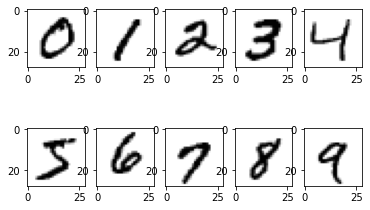

In [ ]:
fig = plt.figure()

for i in range(10):
    for j in range(y_train.shape[0]):
      if y_train[j][i] == 1:
        ax = fig.add_subplot(2, 5, i+1)
        ax.imshow(x_train[j], cmap='gray_r')
        break

In [ ]:
x_train = x_train / np.max(x_train)
x_test = x_test / np.max(x_train)

Normales Sequential Netz:

In [ ]:
seq_model = keras.Sequential()
seq_model.add(layers.Input(shape=(28, 28)))
seq_model.add(layers.Flatten())
seq_model.add(layers.Dense(256, activation='relu', kernel_initializer=keras.initializers.GlorotUniform(123)))
seq_model.add(layers.Dropout(0.2))
seq_model.add(layers.Dense(256, activation='relu', kernel_initializer=keras.initializers.GlorotUniform(123)))
seq_model.add(layers.Dropout(0.2))
seq_model.add(layers.Dense(128, activation='relu', kernel_initializer=keras.initializers.GlorotUniform(124)))
seq_model.add(layers.Dropout(0.2))
seq_model.add(layers.Dense(64, activation='relu', kernel_initializer=keras.initializers.GlorotUniform(125)))
seq_model.add(layers.Dropout(0.2))
seq_model.add(layers.Dense(64, activation='relu', kernel_initializer=keras.initializers.GlorotUniform(126)))
seq_model.add(layers.Dropout(0.2))
seq_model.add(layers.Dense(32, activation='relu', kernel_initializer=keras.initializers.GlorotUniform(127)))
seq_model.add(layers.Dropout(0.2))
seq_model.add(layers.Dense(16, activation='relu', kernel_initializer=keras.initializers.GlorotUniform(128)))
seq_model.add(layers.Dropout(0.2))
seq_model.add(layers.Dense(16, activation='relu', kernel_initializer=keras.initializers.GlorotUniform(129)))
seq_model.add(layers.Dropout(0.2))
seq_model.add(layers.Dense(10, activation='softmax', kernel_initializer=keras.initializers.GlorotUniform(130)))

seq_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0

In [ ]:
seq_model.compile(optimizer='adam', loss=keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
seq_model.fit(x_train, y_train, validation_split=0.1, epochs=20, batch_size=64)

seq_model.evaluate(x_test, y_test, batch_size=64)

Epoch 1/20
844/844 [==============================] - 6s 4ms/step - loss: 1.0835 - accuracy: 0.6211 - val_loss: 0.2804 - val_accuracy: 0.9417
Epoch 2/20
844/844 [==============================] - 3s 4ms/step - loss: 0.4999 - accuracy: 0.8678 - val_loss: 0.1924 - val_accuracy: 0.9605
Epoch 3/20
844/844 [==============================] - 3s 4ms/step - loss: 0.3939 - accuracy: 0.9031 - val_loss: 0.1911 - val_accuracy: 0.9533
Epoch 4/20
844/844 [==============================] - 3s 4ms/step - loss: 0.3286 - accuracy: 0.9205 - val_loss: 0.1536 - val_accuracy: 0.9658
Epoch 5/20
844/844 [==============================] - 3s 4ms/step - loss: 0.2903 - accuracy: 0.9292 - val_loss: 0.1351 - val_accuracy: 0.9688
Epoch 6/20
844/844 [==============================] - 3s 4ms/step - loss: 0.2643 - accuracy: 0.9367 - val_loss: 0.1414 - val_accuracy: 0.9713
Epoch 7/20
844/844 [==============================] - 3s 4ms/step - loss: 0.2489 - accuracy: 0.9396 - val_loss: 0.1497 - val_accuracy: 0.9700
Epoch 

[46.00381088256836, 0.8794000148773193]

Jetzt das gleiche mit der Functional API

In [ ]:
def get_model(input_shape):
  inputs = layers.Input(shape=input_shape)
  x = layers.Flatten()(inputs)
  x = layers.Dense(256, activation='relu', kernel_initializer=keras.initializers.GlorotUniform(123))(x)
  x = layers.Dropout(0.2)(x)
  x = layers.Dense(256, activation='relu', kernel_initializer=keras.initializers.GlorotUniform(124))(x)
  x = layers.Dropout(0.2)(x)
  x = layers.Dense(128, activation='relu', kernel_initializer=keras.initializers.GlorotUniform(125))(x)
  x = layers.Dropout(0.2)(x)
  x = layers.Dense(64, activation='relu', kernel_initializer=keras.initializers.GlorotUniform(126))(x)
  x = layers.Dropout(0.2)(x)
  x = layers.Dense(64, activation='relu', kernel_initializer=keras.initializers.GlorotUniform(127))(x)
  x = layers.Dropout(0.2)(x)
  x = layers.Dense(32, activation='relu', kernel_initializer=keras.initializers.GlorotUniform(128))(x)
  x = layers.Dropout(0.2)(x)
  x = layers.Dense(16, activation='relu', kernel_initializer=keras.initializers.GlorotUniform(139))(x)
  x = layers.Dropout(0.2)(x)
  x = layers.Dense(16, activation='relu', kernel_initializer=keras.initializers.GlorotUniform(130))(x)
  x = layers.Dropout(0.2)(x)
  outputs = layers.Dense(10, activation='softmax', kernel_initializer=keras.initializers.GlorotUniform(131))(x)

  return keras.Model(inputs, outputs)

func_model = get_model((28,28))
func_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 256)               200960    
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 256)               65792     
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 128)               32896 

In [ ]:
func_model.compile(optimizer='adam', loss=keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
func_model.fit(x_train, y_train, validation_split=0.1, epochs=20, batch_size=64)

func_model.evaluate(x_test, y_test, batch_size=64)

Epoch 1/20
844/844 [==============================] - 4s 4ms/step - loss: 1.1877 - accuracy: 0.5644 - val_loss: 0.4048 - val_accuracy: 0.8715
Epoch 2/20
844/844 [==============================] - 4s 4ms/step - loss: 0.5677 - accuracy: 0.8419 - val_loss: 0.1834 - val_accuracy: 0.9618
Epoch 3/20
844/844 [==============================] - 3s 4ms/step - loss: 0.3963 - accuracy: 0.8959 - val_loss: 0.1473 - val_accuracy: 0.9667
Epoch 4/20
844/844 [==============================] - 3s 4ms/step - loss: 0.3313 - accuracy: 0.9146 - val_loss: 0.1211 - val_accuracy: 0.9733
Epoch 5/20
844/844 [==============================] - 3s 4ms/step - loss: 0.2884 - accuracy: 0.9270 - val_loss: 0.1417 - val_accuracy: 0.9717
Epoch 6/20
844/844 [==============================] - 3s 4ms/step - loss: 0.2696 - accuracy: 0.9329 - val_loss: 0.1281 - val_accuracy: 0.9727
Epoch 7/20
844/844 [==============================] - 3s 4ms/step - loss: 0.2476 - accuracy: 0.9367 - val_loss: 0.1076 - val_accuracy: 0.9763
Epoch 

[27.699974060058594, 0.9724000096321106]

Mit der Functional API können wir dann coole Dinge machen wie zum Beispiel "Rechnungen" in das Modell einbauen:

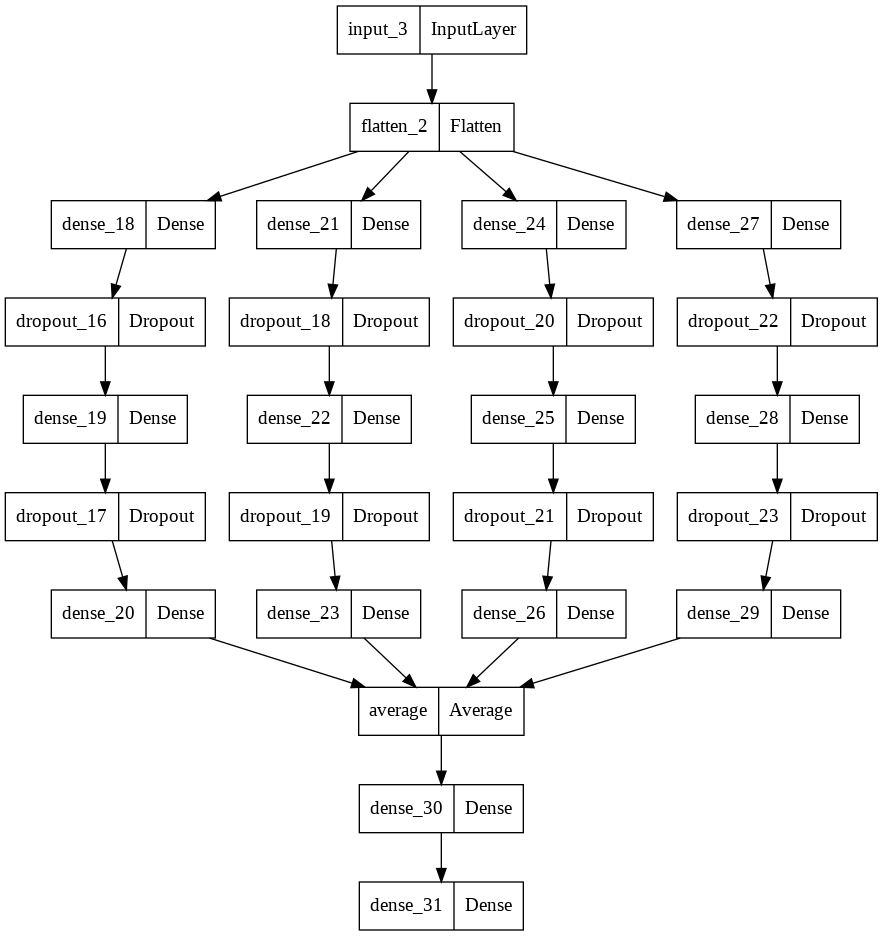

In [ ]:
def get_ensemble_model(input_shape):
  input = layers.Input(shape=input_shape)
  x = layers.Flatten()(input)

  # Teil Model 1
  x1 = layers.Dense(128, activation='relu')(x)
  x1 = layers.Dropout(0.2)(x1)
  x1 = layers.Dense(128, activation='relu')(x1)
  x1 = layers.Dropout(0.2)(x1)
  x1 = layers.Dense(32, activation='relu')(x1)

  # Teil Model 2
  x2 = layers.Dense(128, activation='relu')(x)
  x2 = layers.Dropout(0.2)(x2)
  x2 = layers.Dense(64, activation='relu')(x2)
  x2 = layers.Dropout(0.2)(x2)
  x2 = layers.Dense(32, activation='relu')(x2)

  # Teil Model 3
  x3 = layers.Dense(128, activation='relu')(x)
  x3 = layers.Dropout(0.2)(x3)
  x3 = layers.Dense(32, activation='relu')(x3)
  x3 = layers.Dropout(0.2)(x3)
  x3 = layers.Dense(32, activation='relu')(x3)

  # Teil Model 4
  x4 = layers.Dense(128, activation='relu')(x)
  x4 = layers.Dropout(0.2)(x4)
  x4 = layers.Dense(16, activation='relu')(x4)
  x4 = layers.Dropout(0.2)(x4)
  x4 = layers.Dense(32, activation='relu')(x4)

  # Kombinierenn
  x_combined = layers.Average()([x1, x2, x3, x4])

  x = layers.Dense(16, activation='relu')(x_combined)
  outputs = layers.Dense(10, activation='softmax')(x)

  return keras.Model(input, outputs)

ens_model = get_ensemble_model((28, 28))
keras.utils.plot_model(ens_model, 'my_ensemble_model.png')

In [ ]:
ens_model.compile(optimizer='adam', loss=keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
ens_model.fit(x_train, y_train, validation_split=0.1, epochs=20, batch_size=64)

ens_model.evaluate(x_test, y_test, batch_size=64)

Epoch 1/20
844/844 [==============================] - 5s 5ms/step - loss: 0.3918 - accuracy: 0.8797 - val_loss: 0.1242 - val_accuracy: 0.9643
Epoch 2/20
844/844 [==============================] - 3s 4ms/step - loss: 0.1520 - accuracy: 0.9547 - val_loss: 0.0892 - val_accuracy: 0.9747
Epoch 3/20
844/844 [==============================] - 3s 4ms/step - loss: 0.1074 - accuracy: 0.9678 - val_loss: 0.0955 - val_accuracy: 0.9720
Epoch 4/20
844/844 [==============================] - 3s 4ms/step - loss: 0.0839 - accuracy: 0.9737 - val_loss: 0.0694 - val_accuracy: 0.9802
Epoch 5/20
844/844 [==============================] - 4s 5ms/step - loss: 0.0705 - accuracy: 0.9771 - val_loss: 0.0743 - val_accuracy: 0.9777
Epoch 6/20
844/844 [==============================] - 3s 4ms/step - loss: 0.0592 - accuracy: 0.9808 - val_loss: 0.0731 - val_accuracy: 0.9788
Epoch 7/20
844/844 [==============================] - 4s 4ms/step - loss: 0.0487 - accuracy: 0.9841 - val_loss: 0.0682 - val_accuracy: 0.9803
Epoch 

[18.30634307861328, 0.9818000197410583]

Mit Hilfe von Subclassing kann man das jetzt noch übersichtlicher machen:

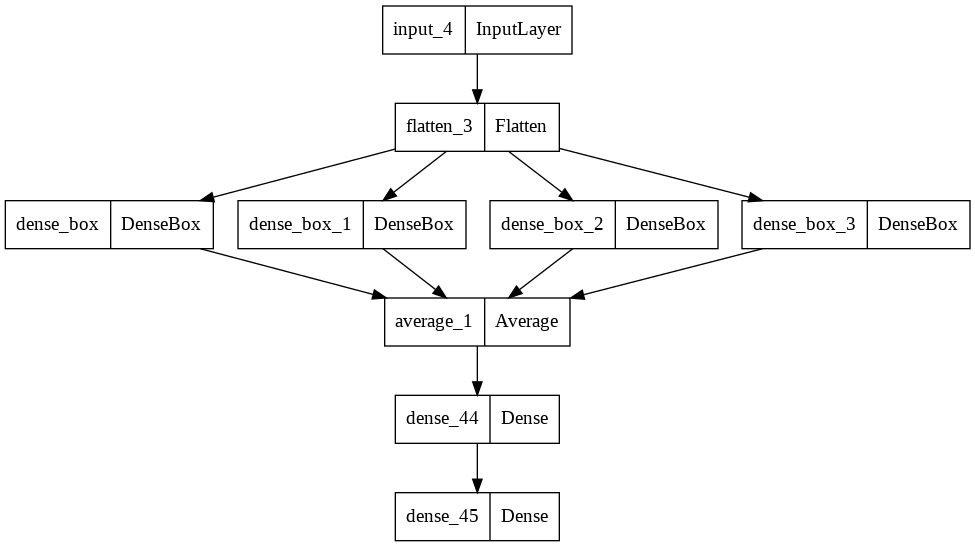

In [ ]:
class DenseBox(layers.Layer):

  def __init__(self, mid_units):
    super(DenseBox, self).__init__()
    self.internal_model = keras.Sequential([
                     layers.Dense(128, activation='relu'),
                     layers.Dropout(0.2),
                     layers.Dense(mid_units, activation='relu'),
                     layers.Dropout(0.2),
                     layers.Dense(32, activation='relu'),
                     layers.Dropout(0.2)            
    ])

  def call(self, inputs):
    return self.internal_model(inputs)

def get_subclassed_model(input_shape):
  input = layers.Input(shape=input_shape)
  x = layers.Flatten()(input)

  x1 = DenseBox(128)(x)
  x2 = DenseBox(64)(x)
  x3 = DenseBox(32)(x)
  x4 = DenseBox(16)(x)

  x = layers.Average()([x1, x2, x3, x4])

  x = layers.Dense(16, activation='relu')(x)
  outputs = layers.Dense(10, activation='softmax')(x)

  return keras.Model(input, outputs)

subclassed_model = get_subclassed_model((28, 28))
keras.utils.plot_model(subclassed_model, 'my_subclassed_model.png')

In [ ]:
subclassed_model.compile(optimizer='adam', loss=keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
subclassed_model.fit(x_train, y_train, validation_split=0.1, epochs=20, batch_size=64)

subclassed_model.evaluate(x_test, y_test, batch_size=64)

Epoch 1/20
844/844 [==============================] - 5s 5ms/step - loss: 0.4815 - accuracy: 0.8530 - val_loss: 0.1238 - val_accuracy: 0.9635
Epoch 2/20
844/844 [==============================] - 4s 4ms/step - loss: 0.1639 - accuracy: 0.9523 - val_loss: 0.0897 - val_accuracy: 0.9723
Epoch 3/20
844/844 [==============================] - 4s 4ms/step - loss: 0.1188 - accuracy: 0.9646 - val_loss: 0.0821 - val_accuracy: 0.9748
Epoch 4/20
844/844 [==============================] - 4s 4ms/step - loss: 0.0943 - accuracy: 0.9720 - val_loss: 0.0703 - val_accuracy: 0.9782
Epoch 5/20
844/844 [==============================] - 4s 5ms/step - loss: 0.0788 - accuracy: 0.9752 - val_loss: 0.0684 - val_accuracy: 0.9798
Epoch 6/20
844/844 [==============================] - 4s 4ms/step - loss: 0.0675 - accuracy: 0.9794 - val_loss: 0.0650 - val_accuracy: 0.9798
Epoch 7/20
844/844 [==============================] - 4s 5ms/step - loss: 0.0595 - accuracy: 0.9809 - val_loss: 0.0645 - val_accuracy: 0.9803
Epoch 

[16.584922790527344, 0.9811000227928162]

# 2. ResNets

Mehr Layer sind nicht immer besser. Es besteht das Problem der Vanishing oder Exploding Gradients, die im schlimmsten Fall sogar dazu führen, dass ein Netz mit mehr layern eine niedrigere Genauigkeit hat als eines mit mehr layern. Das Problem dabei ist erwiesenermaßen NICHT overfitting.

Lösung: Wir bieten dem Netz eine Option an Ebenen zu ignorieren, wenn es diese nicht braucht. Dann muss der Gradient an Ebenen "vorbei fließen" können.

=> Skip Connections / Identity Mapping

Very Deep Network without Skip Connections:

In [ ]:
# Cifar10?
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data() # Dieser Datensatz ist eigentlich zu komplex für ein Fully-Connected Feed-Forward Netz, Baseline: 85% accuracy mit ConvNet

In [ ]:
x_train = x_train/255
x_test = x_test/255

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 10)

In [ ]:
deep_model = keras.Sequential()
n_units = 300
n_layers = 12

deep_model.add(layers.Input(shape=(32, 32, 3)))
deep_model.add(layers.Flatten())

for i in range(n_layers):
  deep_model.add(layers.Dense(n_units, activation='relu'))
  deep_model.add(layers.Dropout(0.3))

deep_model.add(layers.Dense(100, activation='relu'))
deep_model.add(layers.Dense(10, activation='softmax'))

deep_model.compile(optimizer='adam', loss=keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
deep_hist = deep_model.fit(x_train, y_train, batch_size=64, epochs=50, validation_split=0.1)

deep_model.evaluate(x_test, y_test)

Epoch 1/50
704/704 [==============================] - 6s 6ms/step - loss: 2.1733 - accuracy: 0.1587 - val_loss: 2.0925 - val_accuracy: 0.1926
Epoch 2/50
704/704 [==============================] - 4s 6ms/step - loss: 2.1053 - accuracy: 0.1774 - val_loss: 2.1267 - val_accuracy: 0.1806
Epoch 3/50
704/704 [==============================] - 4s 6ms/step - loss: 2.1162 - accuracy: 0.1731 - val_loss: 2.1518 - val_accuracy: 0.1776
Epoch 4/50
704/704 [==============================] - 4s 6ms/step - loss: 2.1291 - accuracy: 0.1702 - val_loss: 2.1161 - val_accuracy: 0.1846
Epoch 5/50
704/704 [==============================] - 4s 6ms/step - loss: 2.0974 - accuracy: 0.1833 - val_loss: 2.1812 - val_accuracy: 0.1506
Epoch 6/50
704/704 [==============================] - 4s 6ms/step - loss: 2.1040 - accuracy: 0.1805 - val_loss: 2.0878 - val_accuracy: 0.1882
Epoch 7/50
704/704 [==============================] - 4s 6ms/step - loss: 2.1477 - accuracy: 0.1618 - val_loss: 2.1193 - val_accuracy: 0.1658
Epoch 

[2.0879921913146973, 0.1817999929189682]

Very Deep Network with Skip Connections:

In [ ]:
class ResidualBlock(layers.Layer):
  def __init__(self, input_shape):
    super(ResidualBlock, self).__init__()

    self.dense_1 = layers.Dense(input_shape, activation='relu')
    self.dropout = layers.Dropout(0.3)
    self.dense_2 = layers.Dense(input_shape, activation='relu')
    self.add = layers.Add()

  def call(self, inputs):
    x = self.dense_1(inputs)
    x = self.dropout(x)
    x = self.dense_2(x)

    combined = self.add([x, inputs])

    return combined

In [ ]:
def get_res_model(input_shape):
  inputs = layers.Input(shape=input_shape)
  x = layers.Flatten()(inputs)

  x = layers.Dense(n_units, activation='relu')(x)

  for i in range(int(n_layers/2)):
    x = ResidualBlock(n_units)(x)
  
  x = layers.Dense(100, activation='relu')(x)
  outputs = layers.Dense(10, activation='softmax')(x)

  return keras.Model(inputs, outputs)

res_model = get_res_model((32, 32, 3))

In [ ]:
res_model.compile(optimizer='adam', loss=keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
res_hist = res_model.fit(x_train, y_train, batch_size=64, epochs=50, validation_split=0.1)

res_model.evaluate(x_test, y_test)

Epoch 1/50
704/704 [==============================] - 6s 7ms/step - loss: 2.0424 - accuracy: 0.2213 - val_loss: 1.9452 - val_accuracy: 0.2478
Epoch 2/50
704/704 [==============================] - 4s 6ms/step - loss: 1.9488 - accuracy: 0.2522 - val_loss: 1.9353 - val_accuracy: 0.2494
Epoch 3/50
704/704 [==============================] - 4s 6ms/step - loss: 1.9338 - accuracy: 0.2568 - val_loss: 1.9497 - val_accuracy: 0.2484
Epoch 4/50
704/704 [==============================] - 4s 6ms/step - loss: 1.9242 - accuracy: 0.2621 - val_loss: 1.9259 - val_accuracy: 0.2594
Epoch 5/50
704/704 [==============================] - 4s 6ms/step - loss: 1.9155 - accuracy: 0.2620 - val_loss: 1.9166 - val_accuracy: 0.2672
Epoch 6/50
704/704 [==============================] - 4s 6ms/step - loss: 1.9145 - accuracy: 0.2653 - val_loss: 1.9598 - val_accuracy: 0.2408
Epoch 7/50
704/704 [==============================] - 4s 6ms/step - loss: 1.9119 - accuracy: 0.2673 - val_loss: 1.9333 - val_accuracy: 0.2488
Epoch 

[1.7838177680969238, 0.3416999876499176]

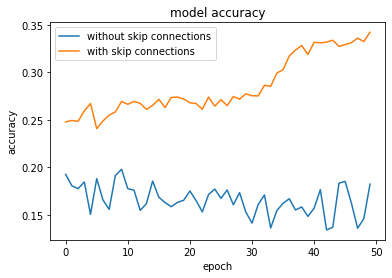

In [ ]:
plt.plot(deep_hist.history['val_accuracy'])
plt.plot(res_hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['without skip connections', 'with skip connections'], loc='upper left')
plt.show()

# 3. Normalization Layers

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data() # Die besten Modelle auf diesem Datensatz haben ca. 99% Genauigkeit ohne Overfit

In [ ]:
x_train = x_train/255
x_test = x_test/255

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [ ]:
norm_model = keras.Sequential()
norm_model.add(layers.Input(shape=(28, 28)))
norm_model.add(layers.Flatten())
norm_model.add(layers.Dense(256, activation='relu', kernel_initializer=keras.initializers.GlorotUniform(123)))
norm_model.add(layers.Dropout(0.2))
norm_model.add(layers.BatchNormalization())
norm_model.add(layers.Dense(256, activation='relu', kernel_initializer=keras.initializers.GlorotUniform(123)))
norm_model.add(layers.Dropout(0.2))
norm_model.add(layers.BatchNormalization())
norm_model.add(layers.Dense(128, activation='relu', kernel_initializer=keras.initializers.GlorotUniform(124)))
norm_model.add(layers.Dropout(0.2))
norm_model.add(layers.BatchNormalization())
norm_model.add(layers.Dense(64, activation='relu', kernel_initializer=keras.initializers.GlorotUniform(125)))
norm_model.add(layers.Dropout(0.2))
norm_model.add(layers.BatchNormalization())
norm_model.add(layers.Dense(64, activation='relu', kernel_initializer=keras.initializers.GlorotUniform(126)))
norm_model.add(layers.Dropout(0.2))
norm_model.add(layers.BatchNormalization())
norm_model.add(layers.Dense(32, activation='relu', kernel_initializer=keras.initializers.GlorotUniform(127)))
norm_model.add(layers.Dropout(0.2))
norm_model.add(layers.BatchNormalization())
norm_model.add(layers.Dense(16, activation='relu', kernel_initializer=keras.initializers.GlorotUniform(128)))
norm_model.add(layers.Dropout(0.2))
norm_model.add(layers.BatchNormalization())
norm_model.add(layers.Dense(16, activation='relu', kernel_initializer=keras.initializers.GlorotUniform(129)))
norm_model.add(layers.Dropout(0.2))
norm_model.add(layers.BatchNormalization())
norm_model.add(layers.Dense(10, activation='softmax', kernel_initializer=keras.initializers.GlorotUniform(130)))

norm_model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_20 (Flatten)        (None, 784)               0         
                                                                 
 dense_465 (Dense)           (None, 256)               200960    
                                                                 
 dropout_374 (Dropout)       (None, 256)               0         
                                                                 
 batch_normalization_8 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dense_466 (Dense)           (None, 256)               65792     
                                                                 
 dropout_375 (Dropout)       (None, 256)               0         
                                                     

In [ ]:
norm_model.compile(optimizer='adam', loss=keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
norm_hist = norm_model.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.1)

norm_model.evaluate(x_test, y_test, batch_size=128)

Epoch 1/20
422/422 [==============================] - 6s 9ms/step - loss: 1.4829 - accuracy: 0.4928 - val_loss: 0.5009 - val_accuracy: 0.8335
Epoch 2/20
422/422 [==============================] - 4s 9ms/step - loss: 0.7720 - accuracy: 0.7550 - val_loss: 0.2655 - val_accuracy: 0.9472
Epoch 3/20
422/422 [==============================] - 4s 8ms/step - loss: 0.5670 - accuracy: 0.8467 - val_loss: 0.1981 - val_accuracy: 0.9560
Epoch 4/20
422/422 [==============================] - 4s 8ms/step - loss: 0.4651 - accuracy: 0.8819 - val_loss: 0.1599 - val_accuracy: 0.9667
Epoch 5/20
422/422 [==============================] - 4s 8ms/step - loss: 0.4073 - accuracy: 0.9007 - val_loss: 0.1704 - val_accuracy: 0.9650
Epoch 6/20
422/422 [==============================] - 4s 8ms/step - loss: 0.3735 - accuracy: 0.9092 - val_loss: 0.1444 - val_accuracy: 0.9708
Epoch 7/20
422/422 [==============================] - 4s 10ms/step - loss: 0.3493 - accuracy: 0.9160 - val_loss: 0.1607 - val_accuracy: 0.9633
Epoch

[0.11128368228673935, 0.9775000214576721]

# Aufgabe: Versuche ein tiefes Netz (min 10 Layer) zu definieren und damit die höchste Accuracy auf dem Fashion MNIST Datensatz zu erzielen

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

X_train = X_train / np.max(X_train)
X_test = X_test / np.max(X_train)